# Content 
* [Home](#back)
* [What sells a car?](#whats_factor)
* [Pre-processing](#pre_proscess)
    * [Loading Data](#load_the_data)
    * [Exploring Initial Data](#'explore_the_data)
    * [Conclusion and Next Steps](#conclusion1)
* [Data Cleansing](#data_cleansing)
    * [Handling Missing Values (If Any)](#fill_null_data)
    * [Fixing Data Types](#data_type)
    * [Fixing Data Quality](#data_quality_fixing)
    * [Checking Clean Data](#data_checking)
* [Analyze Data](#data_analysing)
    * [Studying Core Parameters](#analyzing_core_data)
    * [Studying and Handling Outliers](#data_outliers1)
    * [Studying Core Parameters Without Outliers](#data_outlier2)
* [Data Interpretation](#data_interpretation)
    * [Ad Expiration Period](#ad_expiration_period)
    * [Average Price of Each Vehicle Type](#model_mean_price)
    * [Price Factors](#price_factor)
* [General Conclusion](#final_conclusion)

# What sells a car? <a id= 'whats_factor'></a>

Crankshaft List is a company engaged in vehicle advertising. This analysis report is made to find out the factors that affect the price of a vehicle advertised on the company's website. At least with this report, it can be used to create strategies to improve sales performance on the website.

In this report, there are 4 main stages carried out, namely:

1. Data Preparing
2. Data Cleansing
3. Analyze Data
4. Data Interpretation

## Pre-processing <a id='pre_proscess'></a>

The very first stage in data processing is loading the required libraries. This time we will use 4 libraries, namely:

* Pandas: Data analysis, table manipulation.
* NumPy: Multidimensional array operations.
* Matplotlib: Data visualization, plot graphs.
* Seaborn: Data visualization, high-level statistics.

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data <a id='load_the_data'></a>

We have obtained a dataset that contains the information we need. This dataset will be stored at the file path [/datasets/vehicles_us.csv](https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project3-crankshaft-list-analyze/vehicles_us.csv)
Then, to avoid errors when loading data on the platform, we use the **try_except** method.

In [2]:
# Load the data file into a DataFrame
path = 'https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project3-crankshaft-list-analyze/vehicles_us.csv'
try:
    vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')
except:
    vehicles_data = pd.read_csv(path)

### Exploring Initial Data <a id='explore_the_data'></a>

The dataset we have contains the following columns:

- `price` — vehicle price
- `model_year` — vehicle model year
- `model` — vehicle model
- `condition` — condition of the vehicle
- `cylinders` — number of cylinders in the vehicle
- `fuel` — gas, diesel, etc.
- `odometer` — mileage of the vehicle at the time of the ad  
- `transmission` — lever or pedal usually found in vehicles
- `type` — type of vehicle
- `paint_color` — color of the vehicle
- `is_4wd` — whether the vehicle has four-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was listed until it was removed

In [3]:
# Display general information/summary about the DataFrame
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Display sample data
vehicles_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Checking the column with the most null values
(vehicles_data.isnull().sum()/ len(vehicles_data) * 100).sort_values(ascending= False)

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Findings from the 3 codes above:**
1. There are 13 columns with a total of 51525 rows of data.
2. The columns `'is_4wd'`, `'paint_color'`, `'odometer'`, `'cylinders'`, `'model_year'` have NaN values.
3. There are columns with inappropriate data types (`'model_year'`, `'cylinders'`, `'date_posted'`).
4. The column `'is_4wd'` is the column with the most NaN values.
5. The column `'is_4wd'` has values that are not very descriptive.

### Conclusion and Next Steps <a id='conclusion1'></a>

Unfortunately, the dataset we obtained this time is not completely clean. There are several columns with NaN values that need to be processed in the Data Cleansing stage. There are also several columns with inappropriate data types. We also lack information about the date, month, and year.

To address these issues, there are several things we can do:
1. To handle columns with NaN values, we can fill them with representative values.
2. Columns with inappropriate data types can be converted using methods available in the Pandas library.
3. We can add date, month, and year information after converting the `'date_posted'` column.

After obtaining this information, we will move on to the next stage, which is the Data Cleansing Stage.

## Data Cleansing <a id='data_cleansing'></a>

Unclean or dirty data can be a serious issue in data analysis as it can lead to inaccurate results or errors in decision-making. The main goal of data cleansing is to ensure that the data used in analysis or information applications is accurate, consistent, and reliable.

Let's address the 3 issues from the previous conclusion here.

### Handling Missing Values (If Any) <a id='fill_null_data'></a>

In the data exploration stage, we found 5 columns with missing values. The 5 columns are:

* 'is_4wd'
* 'paint_color'
* 'odometer'
* 'cylinders'

In [6]:
# Finding out the number of NaN values in all columns
vehicles_data.isnull().sum().sort_values(ascending= False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [7]:
# Changing NaN values in the 'paint_color' column
vehicles_data['paint_color'] = vehicles_data['paint_color'].fillna('unknown')
vehicles_data['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

We change NaN values to 'unknown' because there is no complete information from this dataset or other data that mentions the color of the vehicle.

In [8]:
# Changing values in the 'is_4wd' column
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].fillna('no')
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].replace(1.0, 'yes')
vehicles_data['is_4wd'].unique()

array(['yes', 'no'], dtype=object)

According to the description of each column, `'is_4wd'` is a boolean column that should have True or False values. However, in the dataset, the number 1.0 represents another meaning of True and the NaN value is equivalent to 0, which means False. We change these two values to `'yes'` for True and `'no'` for NaN.

In [9]:
# Changing values in the 'model_year' column
vehicles_data['model_year'] = vehicles_data['model_year'].fillna(0)
vehicles_data['model_year'].sort_values().unique()

array([   0., 1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019.])

We change the NaN values in the 'model_year' column to 0 because if we change them to the median or mean year the car was released, it will result in an improper distribution.

In [10]:
# Changing values in the 'cylinders' column
vehicles_data['cylinders'] = vehicles_data['cylinders'].fillna(0)
vehicles_data['cylinders'].unique()

array([ 6.,  4.,  8.,  0.,  5., 10.,  3., 12.])

For the `'odometer'` column, we can use the logic that the older the vehicle is, the larger the odometer reading tends to be. We will create a function that will group the model years of the vehicles and categorize them into 5-year ranges. We will create a new column to be filled with the values generated by the function.

In [11]:
# Creating year_group to be used as a parameter
def year_group(year):
    year = int(year)
    if year == 0:
        return 1

    first_year = (year // 5) * 5
    last_year = first_year + 5

    return f'{first_year}-{last_year}'

In [12]:
# Applying the year_group function
vehicles_data['year_category'] = vehicles_data['model_year'].apply(year_group)
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19,2010-2015
1,25500,0.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,2010-2015
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,no,2019-03-22,9,2000-2005
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,2015-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,no,2018-10-03,37,2010-2015
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,no,2018-11-14,22,2000-2005
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32,2005-2010
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,no,2018-07-02,71,2010-2015


In [13]:
# Creating a pivot table to be used in the following function
median_table = vehicles_data.pivot_table(index= ['model', 'year_category'], values = 'odometer', aggfunc= 'median').reset_index()
median_table

,model,year_category,odometer
0,acura tl,1,123972.0
1,acura tl,1995-2000,196000.0
2,acura tl,2000-2005,180500.0
3,acura tl,2005-2010,139250.0
4,acura tl,2010-2015,122072.0
...,...,...,...
650,volkswagen passat,1995-2000,136000.0
651,volkswagen passat,2000-2005,140656.5
652,volkswagen passat,2005-2010,136343.0
653,volkswagen passat,2010-2015,75839.0


In [14]:
# Creating a function to fill in the odometer
def replace_odo(dataset, grouping):
    for _, row in grouping.iterrows():
        model_vehicles = row['model']
        year_group = row['year_category']
        median_value = row['odometer']

        dataset.loc[(dataset['model'] == model_vehicles) & (dataset['year_category'] == year_group) & (dataset['odometer'].isnull()), 'odometer'] = median_value

    return dataset

In [15]:
vehicles_data = replace_odo(dataset = vehicles_data, grouping= median_table)
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19,2010-2015
1,25500,0.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,2010-2015
3,1500,2003.0,ford f-150,fair,8.0,gas,181030.0,automatic,pickup,unknown,no,2019-03-22,9,2000-2005
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,2015-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,no,2018-10-03,37,2010-2015
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,no,2018-11-14,22,2000-2005
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32,2005-2010
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,no,2018-07-02,71,2010-2015


In [16]:
# Finding out if there are still any null values or not
vehicles_data.isnull().sum()

price             0
model_year        0
model             0
condition         0
cylinders         0
fuel              0
odometer         47
transmission      0
type              0
paint_color       0
is_4wd            0
date_posted       0
days_listed       0
year_category     0
dtype: int64

In [17]:
# Creating a dataframe that only contains null values
odo_null = vehicles_data[vehicles_data['odometer'].isnull()]
odo_null['model'].value_counts()

model
mercedes-benz benze sprinter 2500    41
chrysler 200                          1
toyota tacoma                         1
chevrolet impala                      1
ford taurus                           1
cadillac escalade                     1
ford f-150                            1
Name: count, dtype: int64

In [18]:
# Finding out the overall information about the model before applying the function
anomaly_values = vehicles_data.loc[vehicles_data['model'] == 'mercedes-benz benze sprinter 2500']
print(len(anomaly_values))
anomaly_values

41


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2019-01-15,16,2010-2015
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2018-12-04,36,2010-2015
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2018-08-23,70,2010-2015
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2019-04-12,31,2010-2015
4149,34900,0.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2018-10-12,28,1
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,unknown,no,2018-10-02,32,2010-2015
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2018-12-11,34,2010-2015
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,unknown,no,2018-09-24,45,2010-2015
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,no,2018-09-16,47,2010-2015
11541,34900,0.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,unknown,no,2018-05-28,24,1


It looks like the `mercedes-benz benze sprinter 2500` model is an outlier. Since there is no other data that contains the odometer for this model, we will simply delete its value.

In [19]:
# Removing outlier values
vehicles_data = vehicles_data.dropna()
vehicles_data.isnull().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
year_category    0
dtype: int64

### Fixing Data Types <a id='data_type'></a>

We have filled in the missing values. Now it's time to fix columns with incorrect data types. The columns we will change the data types for are:

* 'model_year'
* 'cylinders'
* 'date_posted'

In [20]:
# Removing the year_category column as it is no longer needed
vehicles_data = vehicles_data.drop(columns= 'year_category')

In [21]:
# Changing the data type of 'model_year' to integer
vehicles_data['model_year'] = vehicles_data['model_year'].astype(int)

In [22]:
# Changing the data type of 'cylinders' to integer
vehicles_data['cylinders'] = vehicles_data['cylinders'].astype(int)

In [23]:
# Changing the data type of 'date_posted' to datetime
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'])

In [24]:
# Rechecking the data types
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51478 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51478 non-null  int64         
 1   model_year    51478 non-null  int32         
 2   model         51478 non-null  object        
 3   condition     51478 non-null  object        
 4   cylinders     51478 non-null  int32         
 5   fuel          51478 non-null  object        
 6   odometer      51478 non-null  float64       
 7   transmission  51478 non-null  object        
 8   type          51478 non-null  object        
 9   paint_color   51478 non-null  object        
 10  is_4wd        51478 non-null  object        
 11  date_posted   51478 non-null  datetime64[ns]
 12  days_listed   51478 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(7)
memory usage: 5.1+ MB


In [25]:
# Viewing the table with corrected data types
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19
1,25500,0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,no,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181030.0,automatic,pickup,unknown,no,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,no,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,no,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,no,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,no,2018-07-02,71


### Improving Data Quality <a id='data_quality_fixing'></a>

As mentioned earlier, this dataset still does not include the date, month, and year after the vehicle was advertised. Additionally, we can add the age of the vehicle. In the 'condition' column, we can also change the values to numeric categories. They are:
* new = 5
* like new = 4
* excellent = 3
* good = 2
* fair = 1
* salvage = 0

In [26]:
# Add the time and date values when the ad was posted
vehicles_data['weekday_posted'] = vehicles_data['date_posted'].dt.weekday
vehicles_data['year_posted'] = vehicles_data['date_posted'].dt.year
vehicles_data['month_posted'] = vehicles_data['date_posted'].dt.month

In [27]:
# Add the age of the vehicle when the ad was posted
vehicles_data['car_age'] = vehicles_data['year_posted'] - vehicles_data['model_year']

In [28]:
# Add the average annual mileage of the vehicle
vehicles_data['odo_per_year'] = vehicles_data['odometer'] / vehicles_data['car_age']

In [29]:
# It might be helpful to change the values in the 'condition' column to something that can be manipulated more easily
vehicles_data['condition'].replace({
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}, inplace=True)

In [30]:
# Viewing the current data condition
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,0,ford f-150,2,6,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,2018,10,2018,43.956888
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181030.0,automatic,pickup,unknown,no,2019-03-22,9,4,2019,3,16,11314.375000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,2019,4,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,no,2018-10-03,37,2,2018,10,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,no,2018-11-14,22,2,2018,11,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32,3,2018,11,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,no,2018-07-02,71,0,2018,7,5,27914.600000


If we look at the `'car_age'` column, there are vehicles with an age greater than 2000. This is because the vehicles were released in the same year as indicated in the `'year_posted'` column. We will also change the vehicle age of 0 to the number 1.

In [31]:
# Changing the unrealistic vehicle ages
vehicles_data.loc[(vehicles_data['car_age'] >= 2000) | (vehicles_data['car_age'] == 0),'car_age'] = 1

In [32]:
# Replacing the 'inf' data in 'odo_per_year'
vehicles_data['odo_per_year'] = vehicles_data['odo_per_year'].replace(np.inf, 0)

In [33]:
# Viewing the current data condition
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,0,ford f-150,2,6,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,2018,10,1,43.956888
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181030.0,automatic,pickup,unknown,no,2019-03-22,9,4,2019,3,16,11314.375000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,2019,4,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,no,2018-10-03,37,2,2018,10,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,no,2018-11-14,22,2,2018,11,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32,3,2018,11,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,no,2018-07-02,71,0,2018,7,5,27914.600000


### Checking the Cleaned Data <a id='data_checking'></a>

Now our dataset is ready for the next stage. Before that, let's review the information contained in our dataset.

In [34]:
# Displaying the dataset size
vehicles_data.shape

(51478, 18)

In [35]:
# Displaying general information/summary about the DataFrame
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51478 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51478 non-null  int64         
 1   model_year      51478 non-null  int32         
 2   model           51478 non-null  object        
 3   condition       51478 non-null  int64         
 4   cylinders       51478 non-null  int32         
 5   fuel            51478 non-null  object        
 6   odometer        51478 non-null  float64       
 7   transmission    51478 non-null  object        
 8   type            51478 non-null  object        
 9   paint_color     51478 non-null  object        
 10  is_4wd          51478 non-null  object        
 11  date_posted     51478 non-null  datetime64[ns]
 12  days_listed     51478 non-null  int64         
 13  weekday_posted  51478 non-null  int32         
 14  year_posted     51478 non-null  int32         
 15  month_p

In [36]:
# Displaying sample data
vehicles_data.describe()

,price,model_year,condition,cylinders,odometer,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,51478.00000,51478.000000,51478.000000,51478.000000,51478.000000,51478,51478.000000,51478.000000,51478.000000,51478.000000,51478.000000,51476.000000
mean,12114.89782,1868.737111,2.637301,5.500253,115268.338067,2018-10-25 01:41:44.293095936,39.555325,3.005245,2018.307413,6.628754,8.065407,15755.061148
min,1.00000,0.000000,0.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.00000,2005.000000,2.000000,4.000000,71144.000000,2018-07-29 00:00:00,19.000000,1.000000,2018.000000,3.000000,3.000000,9000.000000
50%,9000.00000,2010.000000,3.000000,6.000000,114000.000000,2018-10-25 00:00:00,33.000000,3.000000,2018.000000,7.000000,7.000000,13857.142857
75%,16799.75000,2014.000000,3.000000,8.000000,152289.250000,2019-01-21 00:00:00,53.000000,5.000000,2019.000000,10.000000,12.000000,20000.000000
max,375000.00000,2019.000000,5.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.000000,6.000000,2019.000000,12.000000,110.000000,279365.000000
std,10024.44559,513.384433,0.712642,2.432121,62254.186724,NaN,28.209084,1.997563,0.461426,3.474198,6.294562,13057.994522


**Summary of Our Dataset**

We now have 5 additional new columns in our dataset. In summary, we have filled NaN values, corrected the data types of several columns, and improved data quality by adding some additional information that we need. We will move on to the next stage, which is analyzing our clean dataset.

## Analyze Data <a id='data_analyzing'></a>

The data analysis stage in this project includes studying these parameters, exploring patterns and relationships between variables, statistical analysis to find influencing factors, and examining the impact of outliers using charts.

### Studying Core Parameters <a id='analyzing_core_data'></a>

The parameters are:
- Price
- Age of the vehicle when the ad was posted
- Odometer reading
- Number of cylinders
- Condition

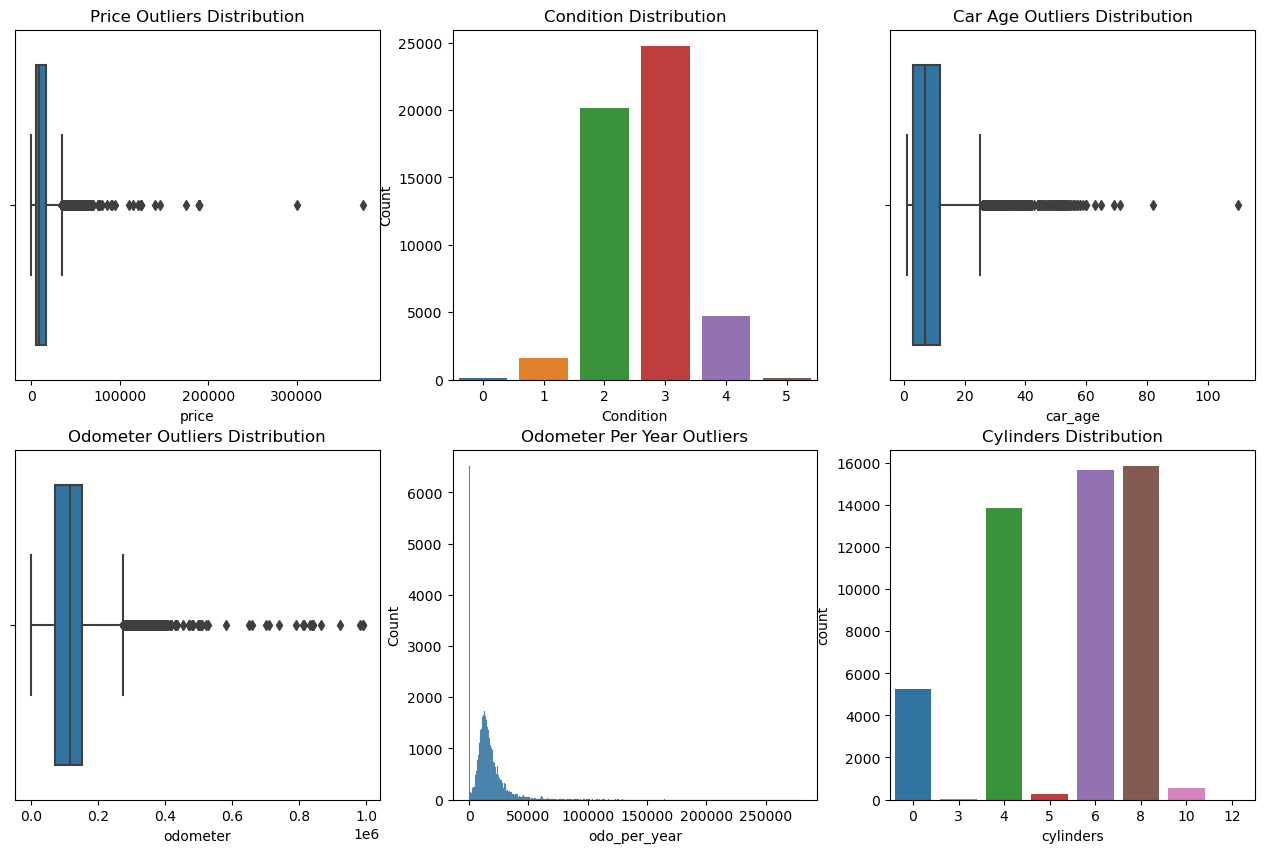

In [37]:
# Viewing outlier values by displaying several charts
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='price', data=vehicles_data)
plt.title('Price Outliers Distribution')

plt.subplot(2, 3, 2)
condition_counts = vehicles_data['condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Condition Distribution')

plt.subplot(2, 3, 3)
sns.boxplot(x='car_age', data=vehicles_data)
plt.title('Car Age Outliers Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(x='odometer', data=vehicles_data)
plt.title('Odometer Outliers Distribution')

plt.subplot(2, 3, 5)
sns.histplot(x='odo_per_year', data=vehicles_data)
plt.title('Odometer Per Year Outliers')

plt.subplot(2, 3, 6)
cylinders_count = vehicles_data['cylinders'].value_counts()
sns.barplot(x=cylinders_count.index, y=cylinders_count.values)
plt.xlabel('cylinders')
plt.ylabel('count')
plt.title('Cylinders Distribution')

plt.show()

**Insights from the Above Graphs**
1. The `'Price Outliers Distribution'` graph shows that there are vehicle prices that are far too high. The prices are very unreasonable.
2. `'Condition Distribution'` indicates that vehicles in good condition are sold quite frequently on our website.
3. The `'Car Age Outliers Distribution'` plot shows vehicles that are over 100 years old, which are also outliers.
4. `'Odometer Outliers Distribution'` shows outliers, possibly because these vehicles have been used for long-distance travel.
5. `'Odometer Per Year Outliers'` also seems to indicate outliers, as seen from the spike in the histogram on the y-axis.
6. The `'Cylinders Distribution'` shows us that vehicles sold on our website mostly have 8 cylinders.nders.

### Studying and Handling Outliers <a id='data_outliers1'></a>

From the above core parameter charts, there are several columns that have outlier values. These columns are:

* `'price'`
* `'car_age'`
* `'odometer'`
* `'odo_per_year'`

In [38]:
# Changing the values of price that are highly unreasonable
vehicles_data.loc[vehicles_data['price'] > 80000, 'price'] = vehicles_data.loc[vehicles_data['price'] > 80000, 'price'] / 10

In [39]:
# Creating a new dataset for testing
test_df = vehicles_data.copy()

We will create a function that will replace outlier values. We will test this function on a new dataset. Only then will we apply this function to our original dataset and save it to a variable without outliers.

In [40]:
# Creating a function to easily determine Q1 and Q3

def find_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_qr = q1 - (iqr * 1.5)
    upper_qr = q3 + (iqr * 1.5)
    return upper_qr,lower_qr 

def drop_outlier(dataframe, columns):
    for column in columns:
        upper, lower = find_outlier(dataframe[column])
        dataframe.loc[dataframe[column] > upper, column] = upper
        dataframe.loc[dataframe[column] < lower, column] = lower
    return dataframe

In [41]:
# Testing the find_outlier function that finds the lower whisker and upper whisker
upper, lower = find_outlier(test_df['price'])
print(lower, upper)

-12692.5 34487.5


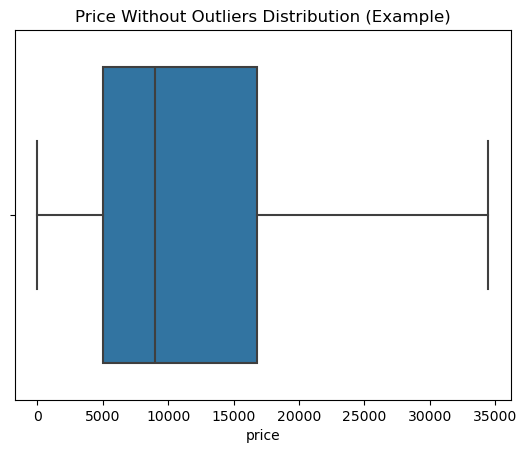

In [42]:
# Testing the drop_outlier function which removes outlier values and saves them in a new variable
df_outlier = drop_outlier(dataframe=test_df, columns=['price', 'odometer', 'odo_per_year', 'car_age'])

sns.boxplot(x='price', data= df_outlier)
plt.title('Price Without Outliers Distribution (Example)')
plt.show()

Alright, it looks like the function executed successfully. Now it's time to apply this function to our original dataset and save it to a new variable. This new dataset will be our data without outliers.

In [43]:
# Copying our original dataset
df = vehicles_data.copy()

In [44]:
# Applying the drop_outlier function to our original dataset and saving it to a separate DataFrame
non_outlier = drop_outlier(dataframe= df, columns=['price', 'odometer', 'odo_per_year', 'car_age'])

# Viewing the upper and lower bounds of several columns that have outliers
upper, lower = find_outlier(non_outlier['price'])
print(f'Upper and Lower Bounds of the "price" Column: {upper, lower}')
print()
upper, lower = find_outlier(non_outlier['car_age'])
print(f'Upper and Lower Bounds of the "car_age" Column: {upper, lower}')
print()
upper, lower = find_outlier(non_outlier['odometer'])
print(f'Upper and Lower Bounds of the "odometer" Column: {upper, lower}')
print()
upper, lower = find_outlier(non_outlier['odo_per_year'])
print(f'Upper and Lower Bounds of the "odo_per_year" Column: {upper, lower}')
print()

Upper and Lower Bounds of the "price" Column: (34487.5, -12692.5)

Upper and Lower Bounds of the "car_age" Column: (25.5, -10.5)

Upper and Lower Bounds of the "odometer" Column: (274007.125, -50573.875)

Upper and Lower Bounds of the "odo_per_year" Column: (36500.0, -7500.0)



### Studying Core Parameters Without Outliers <a id='data_outlier2'></a>

Now that we have created a clean dataset without outliers, let's create graphs that will compare the dataset with outliers to the dataset without outliers.

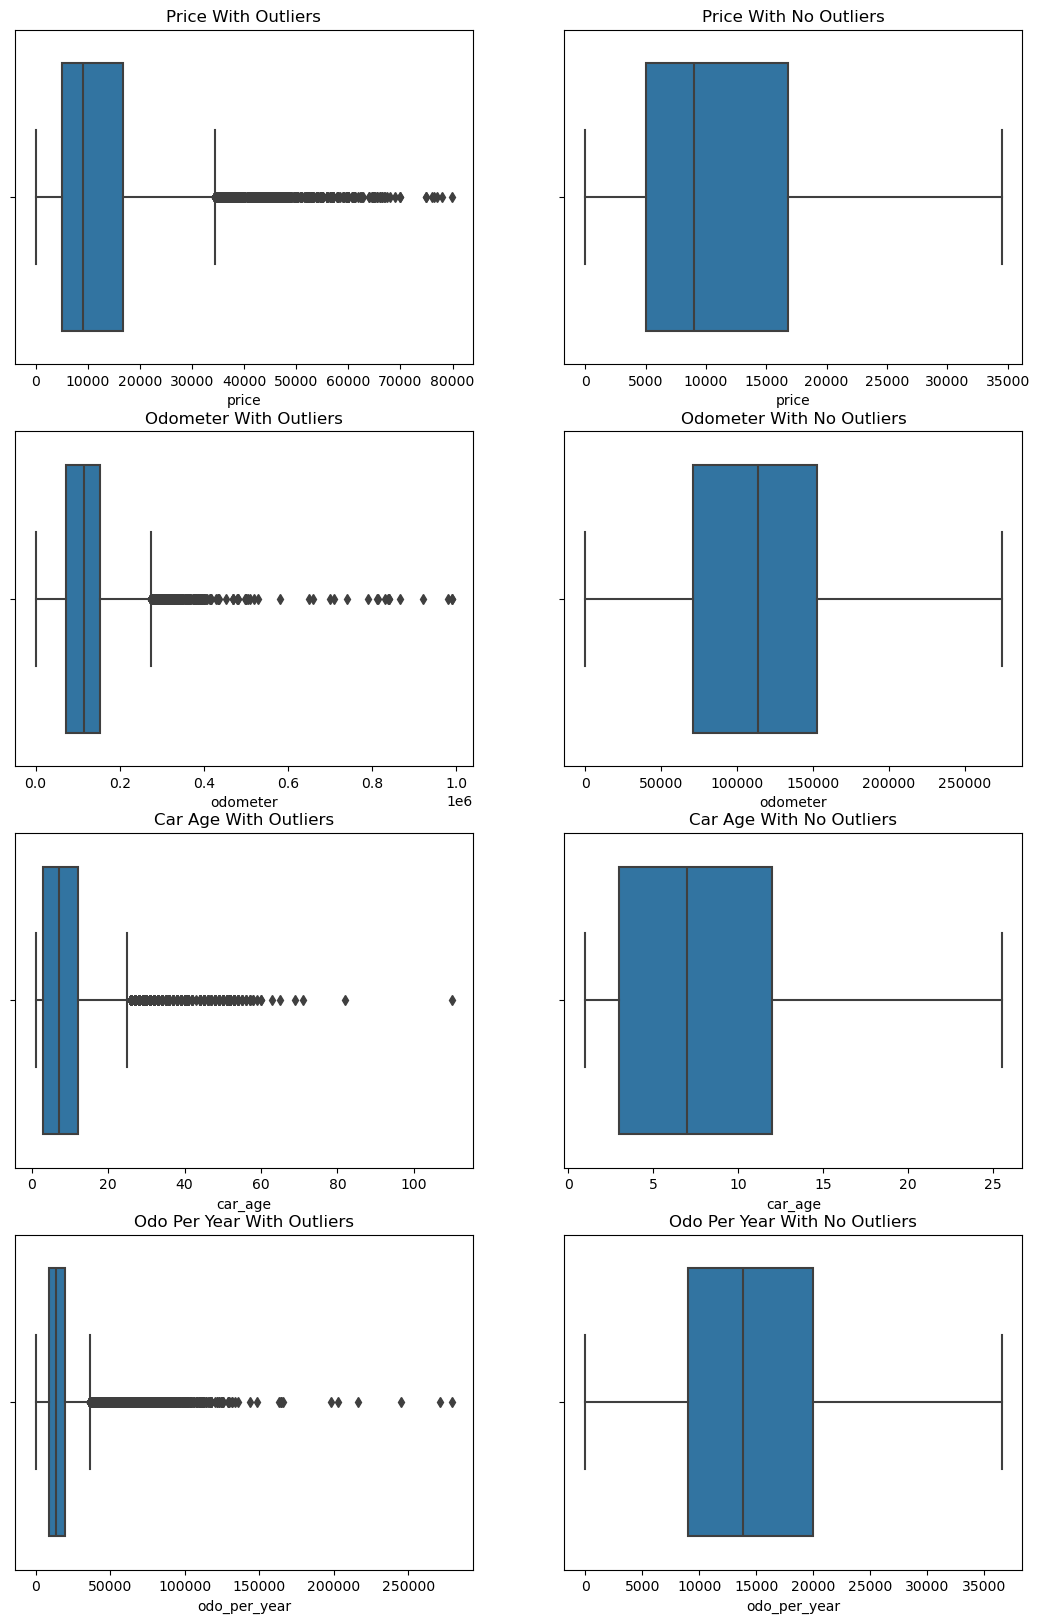

In [45]:
# Comparing the table with outliers to the table without outliers
plt.figure(figsize=(13, 20))

# Making comparisons in the 'price' column
plt.subplot(4,2,1)
plt.title('Price With Outliers')
sns.boxplot(x='price', data= vehicles_data,)

plt.subplot(4,2,2)
plt.title('Price With No Outliers')
sns.boxplot(x='price', data= non_outlier,)

# Making comparisons in the 'odometer' column
plt.subplot(4,2,3)
plt.title('Odometer With Outliers')
sns.boxplot(x='odometer', data= vehicles_data,)

plt.subplot(4,2,4)
plt.title('Odometer With No Outliers')
sns.boxplot(x='odometer', data= non_outlier,)

# Making comparisons in the 'car_age' column
plt.subplot(4,2,5)
plt.title('Car Age With Outliers')
sns.boxplot(x='car_age', data= vehicles_data,)

plt.subplot(4,2,6)
plt.title('Car Age With No Outliers')
sns.boxplot(x='car_age', data= non_outlier,)

# Making comparisons in the 'odo_mean_per_year' column
plt.subplot(4,2,7)
plt.title('Odo Per Year With Outliers')
sns.boxplot(x='odo_per_year', data= vehicles_data,)

plt.subplot(4,2,8)
plt.title('Odo Per Year With No Outliers')
sns.boxplot(x='odo_per_year', data= non_outlier,)

plt.show()

## Data Interpretation <a id='data_interpretation'></a>

Now that we have successfully removed outliers from our dataset, it's time to look for relationships between price and other variables.

**What we're looking for:**
1. Determining when ads are removed quickly and when ads are displayed for a long time.
2. Looking at the average price of each type of vehicle based on ads.
3. Looking at factors that influence vehicle prices.

### Ad Expiration Period <a id='ad_expiration_period'></a>
we want to see when the ad should be removed quickly and when the ad is displayed for a long time. we will look at the mean and median in the `'days_listed'` column. then create a plot of this column.

In [46]:
# create a new dataframe for this stage
final_df = non_outlier.copy()

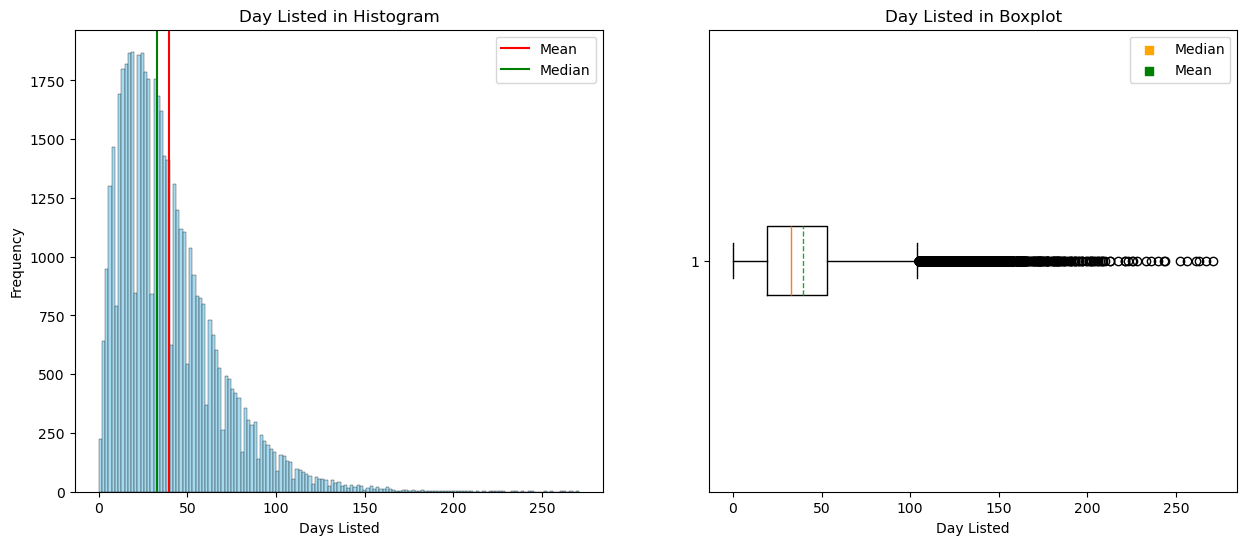

In [47]:
# find the median and mean values in the 'days_listed' column
mean_days_listed = final_df['days_listed'].mean()
median_days_listed = final_df['days_listed'].median()
q3_days_list = final_df['days_listed'].quantile(0.75)

# set the size of the graph
plt.figure(figsize=(15, 6))

# create a histogram of the 'days_listed' column
plt.subplot(1, 2, 1)
sns.histplot(final_df['days_listed'], color='skyblue')
plt.axvline(mean_days_listed, color='red', label='Mean')
plt.axvline(median_days_listed, color='green', label='Median')
plt.title('Day Listed in Histogram')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.legend()

# create a boxplot of the 'days_listed' column
plt.subplot(1, 2, 2)
plt.boxplot(data= final_df, x= 'days_listed', vert= False, showmeans=True, meanline= True)
plt.xlabel('Day Listed')
plt.title('Day Listed in Boxplot')
plt.scatter([], [], c='orange', label='Median', marker= 's')
plt.scatter([], [], c='green', label='Mean', marker= 's')
plt.legend()

plt.show()

**Insight From the Graph Above:**

if we look at the histogram graph, many cars are sold in the range of 35-55 days after the ad is displayed. we will use some conditions to determine when the ad is removed.

* ad is removed quickly if `'days_listed'` is less than the median.
* ad is displayed for a long time if `'days_listed'` is more than the median and less than its Q3.
* ad will be considered removed if `'days_listed'` exceeds its Q3.

In [48]:
# determine when the ad is removed
final_df['ad_expiration'] = np.where(final_df['days_listed'] < median_days_listed, 'removed quickly',
                               np.where((final_df['days_listed'] >= median_days_listed) & (final_df['days_listed'] < q3_days_list), 'posted long', 'deleted'))

# view the newly created column
final_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year,ad_expiration
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,yes,2018-06-23,19,5,2018,6,7.0,20714.285714,removed quickly
1,25500.0,0,ford f-150,2,6,gas,88705.0,automatic,pickup,white,yes,2018-10-19,50,4,2018,10,1.0,43.956888,posted long
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,no,2019-02-07,79,3,2019,2,6.0,18333.333333,deleted
3,1500.0,2003,ford f-150,1,8,gas,181030.0,automatic,pickup,unknown,no,2019-03-22,9,4,2019,3,16.0,11314.375000,removed quickly
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,no,2019-04-02,28,1,2019,4,2.0,36500.000000,removed quickly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,no,2018-10-03,37,2,2018,10,5.0,17627.200000,posted long
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,no,2018-11-14,22,2,2018,11,16.0,11343.750000,removed quickly
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,no,2018-11-15,32,3,2018,11,9.0,14222.222222,removed quickly
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,no,2018-07-02,71,0,2018,7,5.0,27914.600000,deleted


### Average Price of Each Vehicle Type <a id='model_mean_price'></a>

we will analyze the average price of each vehicle and the number of ads. we will create a graph to see the dependency of the number of ads on the type of vehicle.

we will look at what types of vehicles are most popular on our company's website.

In [49]:
# aggregate the data
model_price_by_ad = final_df.query("ad_expiration != 'deleted'").groupby('type').agg({
    'price': 'mean',
    'ad_expiration': 'count'
}).sort_values(by= 'ad_expiration', ascending= False).reset_index()
model_price_by_ad

,type,price,ad_expiration
0,SUV,10979.325773,9180
1,truck,16065.630736,9136
2,sedan,6944.289203,9030
3,pickup,15627.013259,5204
4,coupe,13948.306525,1747
5,wagon,9022.060965,1140
6,mini-van,8066.901602,874
7,hatchback,6845.104331,762
8,van,8294.538372,430
9,convertible,13750.615044,339


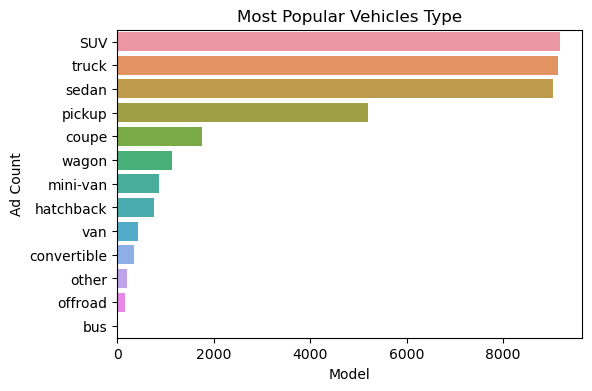

In [50]:
# create a barplot comparing the dependency of vehicle models on the number of ads
plt.figure(figsize= (6,4))
sns.barplot(x='ad_expiration', y='type', data= model_price_by_ad)

# add labels and title
plt.xlabel('Model')
plt.ylabel('Ad Count')
plt.title('Most Popular Vehicles Type')
plt.show()

**Insight From the Table and Graph Above**

it turns out that SUV, Truck, and Sedan types are the top-ranking and most sold vehicles on our website. with the total:

* SUV type is priced at 10979.325773 with 9180 ads on the website
* Truck costs around 16065.630736 with 9136 ads on our website
* Sedan car is priced around 6944.289203 with 9030 ads on the website
* Bus is the least sold vehicle type on our website

### Price Factors <a id='price_factor'></a>

At this stage, we will look at what factors influence the price of the top 2 vehicle types. We will use the following factors:
* transmission type
* color
* age
* mileage
* condition

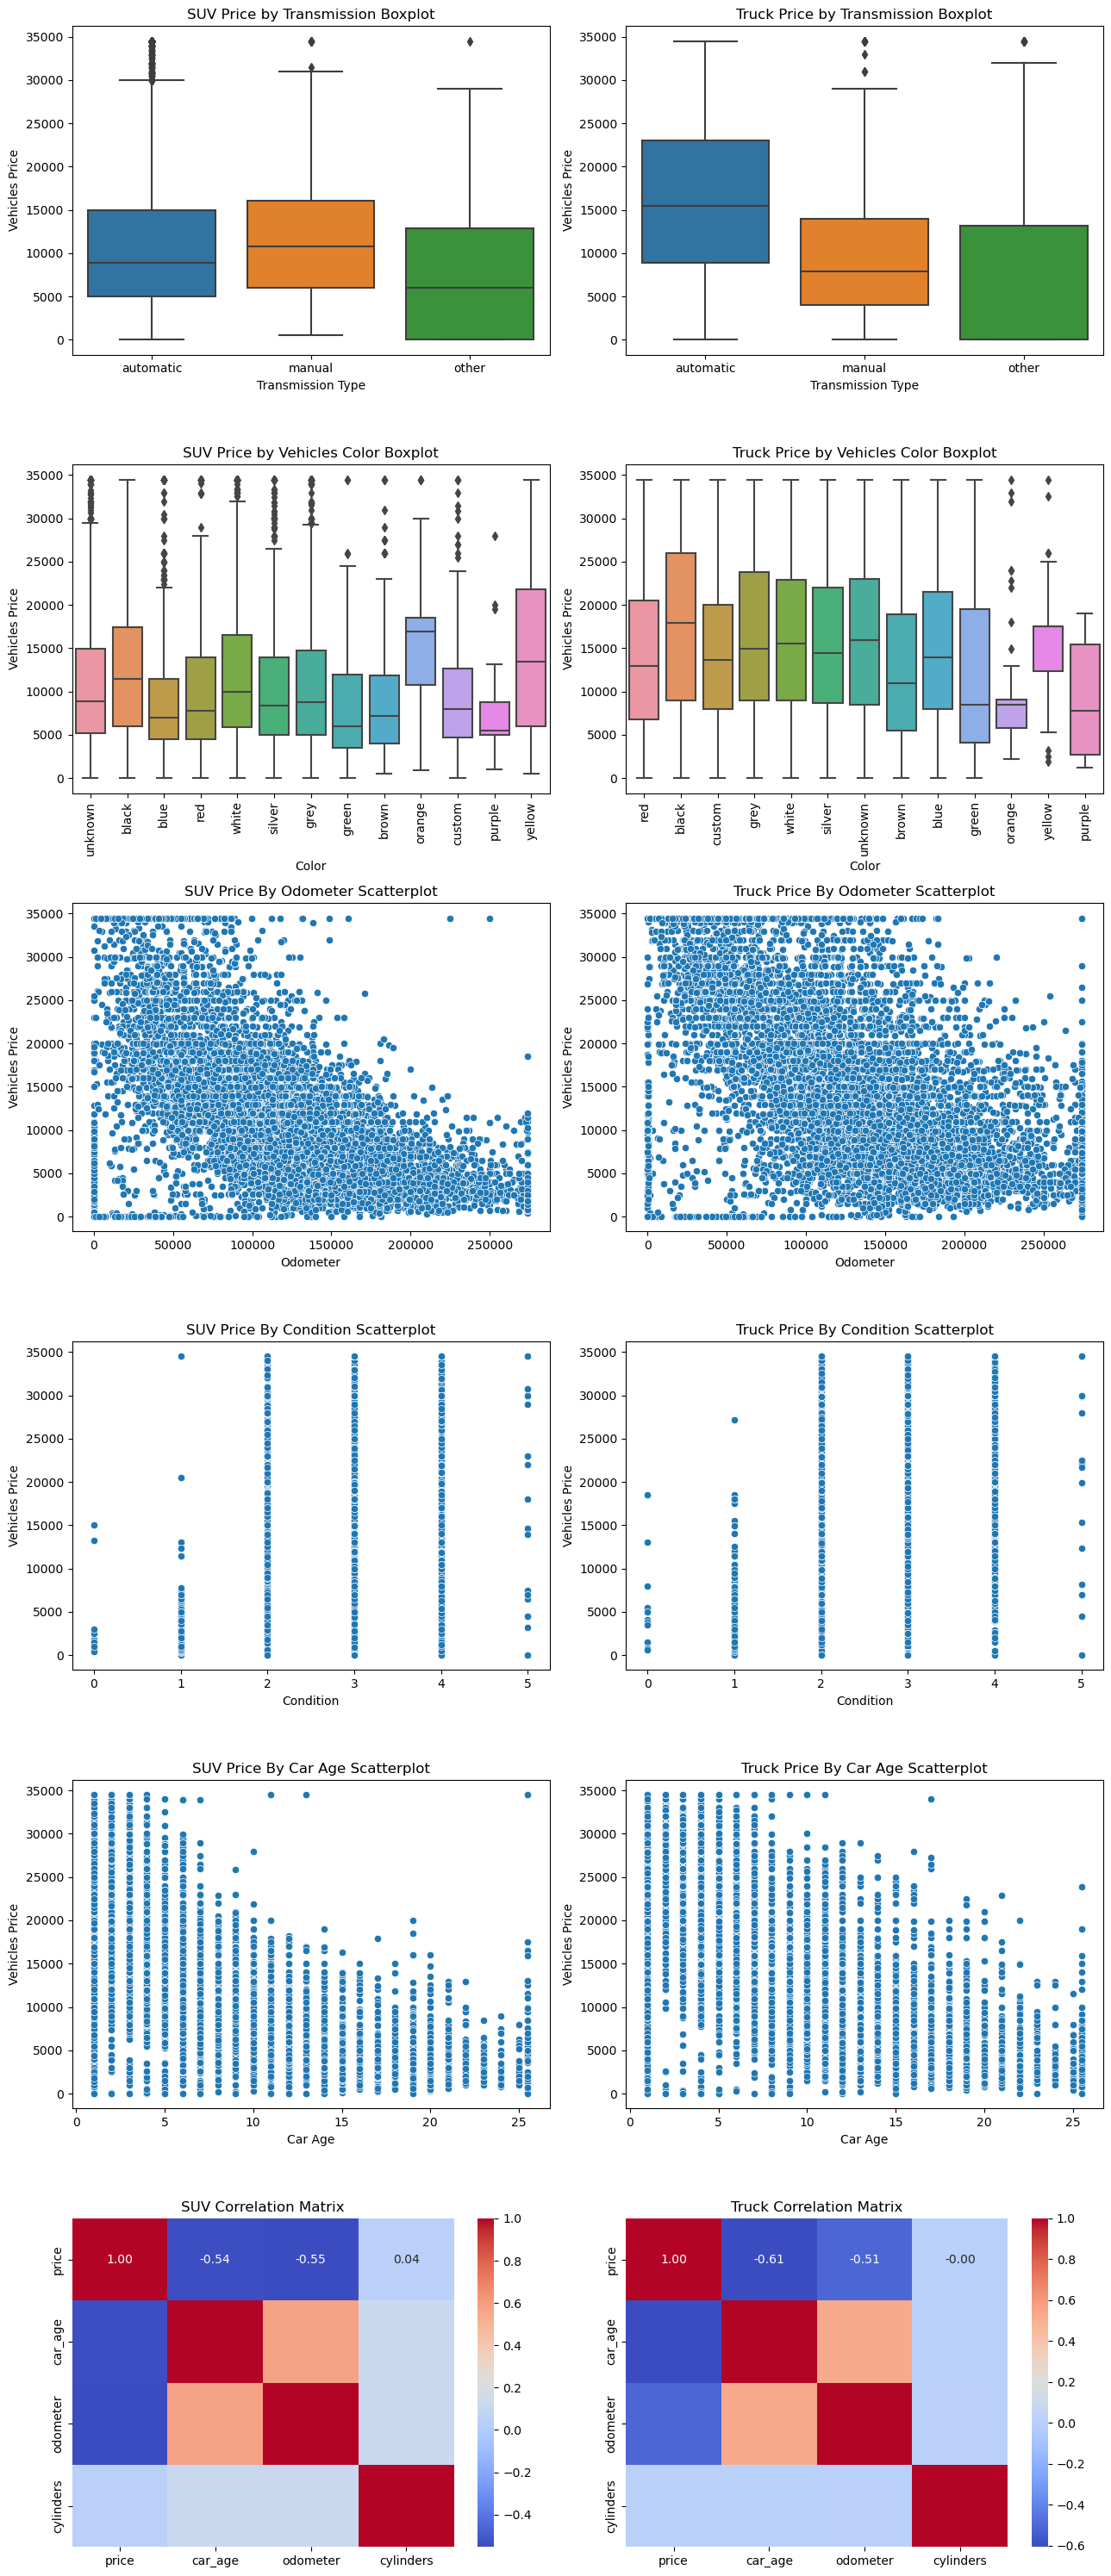

In [51]:
# create a dataframe containing only SUV and Truck vehicles
suv_df = final_df[final_df['type'] == 'SUV']
truck_df = final_df[final_df['type'] == 'truck']

# boxplot graph for transmission type and color
plt.figure(figsize=(13, 30))
plt.subplot(6, 2, 1)
sns.boxplot(x='transmission', y='price', data=suv_df)
plt.title('SUV Price by Transmission Boxplot')
plt.xlabel('Transmission Type')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 2)
sns.boxplot(x='transmission', y='price', data=truck_df)
plt.title('Truck Price by Transmission Boxplot')
plt.xlabel('Transmission Type')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 3)
sns.boxplot(x='paint_color', y='price', data=suv_df)
plt.title('SUV Price by Vehicles Color Boxplot')
plt.xlabel('Color')
plt.ylabel('Vehicles Price')
plt.xticks(rotation= 'vertical')

plt.subplot(6, 2, 4)
sns.boxplot(x='paint_color', y='price', data=truck_df)
plt.title('Truck Price by Vehicles Color Boxplot')
plt.xlabel('Color')
plt.ylabel('Vehicles Price')
plt.xticks(rotation= 'vertical')

# scatterplot for mileage, vehicle age, and vehicle condition
plt.subplot(6, 2, 5)
sns.scatterplot(x='odometer', y='price', data=suv_df)
plt.title('SUV Price By Odometer Scatterplot')
plt.xlabel('Odometer')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 6)
sns.scatterplot(x='odometer', y='price', data=truck_df)
plt.title('Truck Price By Odometer Scatterplot')
plt.xlabel('Odometer')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 7)
sns.scatterplot(x='condition', y='price', data=suv_df)
plt.title('SUV Price By Condition Scatterplot')
plt.xlabel('Condition')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 8)
sns.scatterplot(x='condition', y='price', data=truck_df)
plt.title('Truck Price By Condition Scatterplot')
plt.xlabel('Condition')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 9)
sns.scatterplot(x='car_age', y='price', data=suv_df)
plt.title('SUV Price By Car Age Scatterplot')
plt.xlabel('Car Age')
plt.ylabel('Vehicles Price')

plt.subplot(6, 2, 10)
sns.scatterplot(x='car_age', y='price', data=truck_df)
plt.title('Truck Price By Car Age Scatterplot')
plt.xlabel('Car Age')
plt.ylabel('Vehicles Price')

# Correlation matrix and correlation plot
plt.subplot(6, 2, 11)
correlation_matrix = suv_df[['price', 'car_age', 'odometer', 'cylinders']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('SUV Correlation Matrix')

plt.subplot(6, 2, 12)
correlation_matrix = truck_df[['price', 'car_age', 'odometer', 'cylinders']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Truck Correlation Matrix')

plt.tight_layout()
plt.show()

**Insight From the Graphs Above:**

* Vehicles with manual transmission are the most expensive in the SUV type, while in trucks, the most expensive are trucks with automatic transmission.
* The most expensive color is orange for SUV type, while for trucks, it's black.
* Both types of vehicles decrease in price as the mileage increases.
* Both types of vehicles seem to be mostly sold in new, excellent, and good conditions (like new = 4, excellent = 3, good = 2) on our website.
* In the vehicle age graph, like the odometer, the older the SUV and Truck, the cheaper they are.
* In the last graph, both types of vehicles show a positive correlation between vehicle age and odometer column. This means that the older the vehicle, the greater the distance traveled.

## General Conclusion <a id='final_conclusion'></a>

We have analyzed the datase [/datasets/vehicles_us.csv](https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project3-crankshaft-list-analyze/vehicles_us.csv)
Then, to avoid errors when loading data on the platform, we use the **try_except** method.'` to find out the relationships and factors that influence the price of a vehicle sold on our company's website. Here's what we've gone through:

1. We have handled missing values, fixed data types, and added some columns.
2. We learned core parameters with outliers and compared them with a dataset without outliers.
3. We created comparison graphs between the dataset with outliers and the dataset without outliers.
4. We determined when ads are removed quickly and when ads are displayed for a long time.
5. We created a graph showing the dependency of ads on the type of vehicle.
6. Finally, we looked at some factors that could affect the price of a vehicle.

From the graphs examining the factors influencing the price of both vehicles, we can see that there are 2 most popular vehicles sold on our website, namely SUV and Truck. Both of these vehicles are influenced by transmission type, color, cylinder count, vehicle age, and mileage.